In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-tyiw1x_2 because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
EXP_ID = '230510-1447'
exp_filename = '../data/' + EXP_ID + '/energy.log'

if (SAVE_FIG):
    out_dir = '../outputs/' + EXP_ID + '/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

In [4]:
def read_data(exp_filename):
    data = []
    with open(exp_filename,'r') as f:
        for line in f:
            exp = {}
            for item in line.split():
                key, val = item.split('=')
                if key in ['energy_uJ']:
                    val = float(val)
                exp[key] = val
            if val > 0:
                data.append(exp)

    df = pd.DataFrame(data)
    return df

In [5]:
exp_df = read_data(exp_filename)
exp_df['energy_kJ'] = exp_df['energy_uJ'] * 10e-9
exp_df

,cc,mtu,energy_uJ,energy_kJ
0,udp,1500,5.112679e+09,51.126787
1,udp,1500,5.263443e+09,52.634426
2,udp,1500,4.492003e+09,44.920034
3,udp,1500,5.039248e+09,50.392481
4,udp,1500,4.911428e+09,49.114280
...,...,...,...,...
432,highspeed,9000,1.508022e+09,15.080221
433,highspeed,9000,1.522508e+09,15.225076
434,highspeed,9000,1.514938e+09,15.149381
435,highspeed,9000,1.519148e+09,15.191477


In [6]:
print('\n', exp_df.groupby(['cc', 'mtu'])['energy_kJ'].mean().unstack().sort_values(['1500']), 
      '\n', exp_df.groupby(['cc', 'mtu'])['energy_kJ'].std().unstack().sort_values(['1500']))


 mtu             1500       9000
cc                             
bbr        17.749686  15.293004
scalable   18.214169  14.957401
highspeed  18.353316  15.177381
westwood   18.454442  15.105567
reno       18.880696  15.210648
dctcp      19.006470  15.238044
cubic      19.640666  15.188219
vegas      20.262299  15.164257
none       20.717250  16.694621
bbr2       24.589907  17.434739
udp        49.581827  24.503362 
 mtu            1500      9000
cc                           
scalable   0.326013  0.122542
highspeed  0.410460  0.179242
none       0.512589  0.390426
bbr        0.596702  0.204971
reno       0.609940  0.294752
dctcp      0.672992  0.249374
westwood   0.714618  0.124512
cubic      0.812261  0.146235
vegas      1.057544  0.084108
bbr2       1.715366  2.793008
udp        2.479842  1.800865


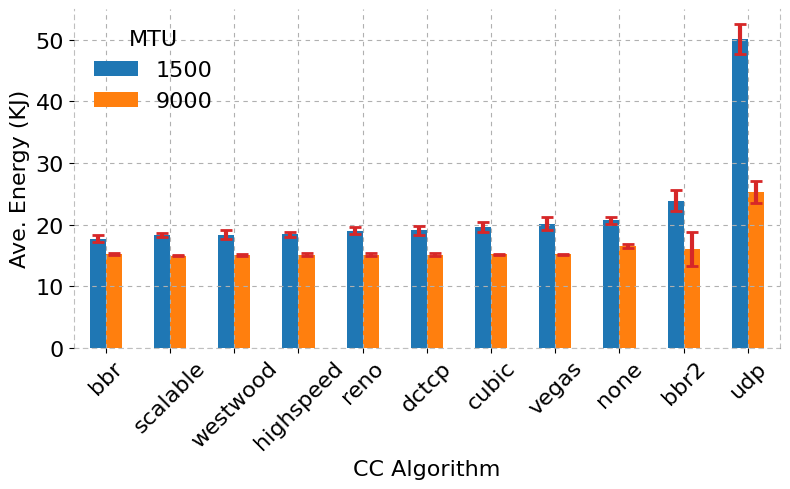

In [7]:
# plt.figure(figsize=FIG_SIZE)
exp_df.groupby(['cc', 'mtu'])['energy_kJ'].median().unstack().sort_values(['1500']).plot.bar(
    yerr=exp_df.groupby(['cc', 'mtu'])['energy_kJ'].std().unstack().sort_values(['1500']), 
    error_kw=dict(lw=3, capsize=4, capthick=2, ecolor='C3')
    )

plt.xlabel('CC Algorithm', fontsize=FONT_SIZE)
plt.ylabel('Ave. Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0, 55))
plt.xticks(rotation = 45)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, 
                 title='MTU', fontsize=FONT_SIZE)
plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cca_energy.pdf')

plt.show()